# Imports 

In [22]:
from datetime import datetime
import numpy as np
import os
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import scipy as sp
import pickle

In [23]:
!pip install cdsapi

In [24]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Download Data via Copernicus API

In [25]:
url = 'url: https://cds.climate.copernicus.eu/api/v2'
key = 'key: 59923:dc18e3f9-2ffd-444b-83aa-eecaeac9212a'

with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([url, key]))

with open('/root/.cdsapirc') as f:
    print(f.read())

url: https://cds.climate.copernicus.eu/api/v2
key: 59923:dc18e3f9-2ffd-444b-83aa-eecaeac9212a


In [26]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-pressure-levels',
    {
        'product_type': 'reanalysis',
        'variable': [
            'geopotential', 'relative_humidity', 'specific_rain_water_content',
            'specific_snow_water_content', 'temperature',
        ],
        'pressure_level': [
            '1', '2', '3',
            '5', '7', '10',
            '20', '30', '50',
            '70', '100', '125',
            '150', '175', '200',
            '225', '250', '300',
            '350', '400', '450',
            '500', '550', '600',
            '650', '700', '750',
            '775', '800', '825',
            '850', '875', '900',
            '925', '950', '975',
            '1000',
        ],
        'year': '2019',
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': [
            '08', '15', '22',
            '29',
        ],
        'time': [
            '00:00',
        ],
        'area': [
            85, -170, 40,
            -50,
        ],
        'format': 'netcdf',
    },
    '/content/drive/My Drive/era5_4days.nc')

2020-10-27 16:35:13,813 INFO Welcome to the CDS
2020-10-27 16:35:13,814 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2020-10-27 16:35:14,513 INFO Request is queued


KeyboardInterrupt: ignored

# Load Data

In [27]:
path = "/content/drive/My Drive"
file = os.path.join(path, "era5_ver1.nc")

In [28]:
DS = xr.open_dataset(file)

In [31]:
DS

<xarray.Dataset>
Dimensions:    (latitude: 181, level: 37, longitude: 481, time: 12)
Coordinates:
  * longitude  (longitude) float32 -170.0 -169.75 -169.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 85.0 84.75 84.5 84.25 ... 40.5 40.25 40.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 2019-01-15 2019-02-15 ... 2019-12-15
Data variables:
    z          (time, level, latitude, longitude) float32 441687.5 ... 2740.5312
    r          (time, level, latitude, longitude) float32 0.18276978 ... 60.92409
    crwc       (time, level, latitude, longitude) float32 0.0 0.0 ... 0.0 0.0
    cswc       (time, level, latitude, longitude) float32 -1.1641532e-10 ... -1.1641532e-10
    t          (time, level, latitude, longitude) float32 204.96323 ... 285.6156
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-26 21:44:06 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [30]:
# Convert XArray to dataframe
ds = DS.to_dataframe()

In [32]:
ds

z  ...           t
latitude level longitude time                       ...            
85.0     1     -170.0    2019-01-15  441687.500000  ...  204.963226
                         2019-02-15  418660.625000  ...  200.793396
                         2019-03-15  424438.156250  ...  254.122787
                         2019-04-15  469758.312500  ...  269.510834
                         2019-05-15  481888.062500  ...  279.213806
...                                            ...  ...         ...
40.0     1000  -50.0     2019-08-15    1674.265625  ...  297.608948
                         2019-09-15    1137.359375  ...  289.534180
                         2019-10-15    1538.156250  ...  291.053314
                         2019-11-15    2173.375000  ...  285.235809
                         2019-12-15    2740.531250  ...  285.615601

[38655084 rows x 5 columns]

# Data preprocessing

In [33]:
ds.reset_index(inplace=True)
ds['time'] = pd.to_datetime(ds['time'])

In [34]:
ds

latitude  level  longitude  ...          crwc          cswc           t
0             85.0      1     -170.0  ...  0.000000e+00 -1.164153e-10  204.963226
1             85.0      1     -170.0  ...  0.000000e+00 -1.164153e-10  200.793396
2             85.0      1     -170.0  ...  0.000000e+00 -1.164153e-10  254.122787
3             85.0      1     -170.0  ...  0.000000e+00 -1.164153e-10  269.510834
4             85.0      1     -170.0  ...  0.000000e+00 -1.164153e-10  279.213806
...            ...    ...        ...  ...           ...           ...         ...
38655079      40.0   1000      -50.0  ...  3.401365e-06 -1.164153e-10  297.608948
38655080      40.0   1000      -50.0  ...  1.952145e-05 -1.164153e-10  289.534180
38655081      40.0   1000      -50.0  ...  2.430170e-08 -1.164153e-10  291.053314
38655082      40.0   1000      -50.0  ...  1.150393e-05 -1.164153e-10  285.235809
38655083      40.0   1000      -50.0  ...  0.000000e+00 -1.164153e-10  285.615601

[38655084 rows x 9 columns]

In [35]:
# Load in locations/dates of relevant vertical profiles
locs = pd.read_csv('/era5_loc.csv') 

In [36]:
locs.rename(columns={'i': 'latitude', 'j':'longitude'}, inplace=True)
locs['time'] = pd.to_datetime(locs['time'])

In [37]:
locs

latitude  longitude       time
0           83.1      -74.5 2019-05-15
1           83.1      -74.4 2019-05-15
2           83.1      -72.7 2019-05-15
3           83.1      -72.7 2019-06-15
4           83.1      -72.6 2019-05-15
...          ...        ...        ...
695827      40.0      -74.2 2019-02-15
695828      40.0      -74.2 2019-11-15
695829      40.0      -74.1 2019-01-15
695830      40.0      -74.1 2019-02-15
695831      40.0      -74.1 2019-11-15

[695832 rows x 3 columns]

In [38]:
# Only take observations that have corresponding skin temperatures of -5 to 5 degrees
merged_ds = pd.merge(ds, locs, on=['longitude', 'latitude', 'time'])
merged_ds

latitude  level  longitude  ... crwc          cswc           t
0            83.0      1      -77.5  ...  0.0 -1.164153e-10  278.913879
1            83.0      2      -77.5  ...  0.0 -1.164153e-10  267.966370
2            83.0      3      -77.5  ...  0.0 -1.164153e-10  259.036591
3            83.0      5      -77.5  ...  0.0 -1.164153e-10  247.668411
4            83.0      7      -77.5  ...  0.0 -1.164153e-10  240.526535
...           ...    ...        ...  ...  ...           ...         ...
1035292      40.0    900      -74.5  ...  0.0 -1.164153e-10  275.092682
1035293      40.0    925      -74.5  ...  0.0 -1.164153e-10  274.079926
1035294      40.0    950      -74.5  ...  0.0 -1.164153e-10  274.535645
1035295      40.0    975      -74.5  ...  0.0 -1.164153e-10  276.235931
1035296      40.0   1000      -74.5  ...  0.0 -1.164153e-10  277.893341

[1035297 rows x 9 columns]

In [39]:
ii = merged_ds.sort_values(by = ['latitude', 'longitude', 'time', 'level']).groupby(['latitude', 'longitude', 'time'])

In [40]:
# List to store vertical profiles of interest
dfs = []
for name, group in ii:
  group['t'] = group['t'].map(lambda x: x - 273.15)
  group['snow_frac'] = group.apply(lambda row: row['cswc']/(row['crwc'] + row['cswc']), axis=1)
  dfs.append(group)

In [41]:
len(dfs)

27981

In [42]:
final_ds = pd.concat(dfs)

In [43]:
# Fix invalid snow fraction values
final_ds['snow_frac'] = final_ds['snow_frac'].map(lambda x: 0 if x < 0 else x) 
final_ds['snow_frac'] = final_ds['snow_frac'].map(lambda x: 1 if x > 1 else x) 

In [44]:
final_ds.set_index(['latitude', 'longitude', 'time'])

level              z  ...          t  snow_frac
latitude longitude time                              ...                      
40.0     -123.5    2019-02-15      1  460456.843750  ... -17.021185        1.0
                   2019-02-15      2  409253.312500  ... -17.383429        1.0
                   2019-02-15      3  379972.500000  ... -26.322958        1.0
                   2019-02-15      5  344400.000000  ... -35.026816        1.0
                   2019-02-15      7  321917.625000  ... -46.889685        1.0
...                              ...            ...  ...        ...        ...
83.0     -68.0     2019-08-15    900    9856.546875  ...   4.499872        1.0
                   2019-08-15    925    7663.515625  ...   5.384088        1.0
                   2019-08-15    950    5530.984375  ...   5.066644        1.0
                   2019-08-15    975    3451.375000  ...   4.077264        1.0
                   2019-08-15   1000    1439.843750  ...   3.602045        1.0

[1035297 rows x 7 columns]

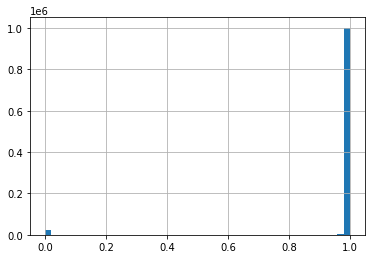

In [45]:
final_ds['snow_frac'].hist(bins=50)

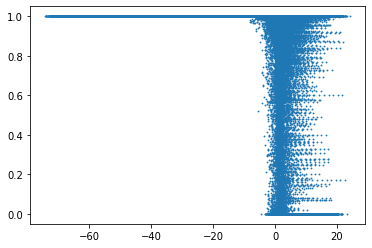

In [46]:
plt.scatter(final_ds.t, final_ds.snow_frac, s=0.7)

2020-10-27 16:38:28,628 INFO NumExpr defaulting to 4 threads.


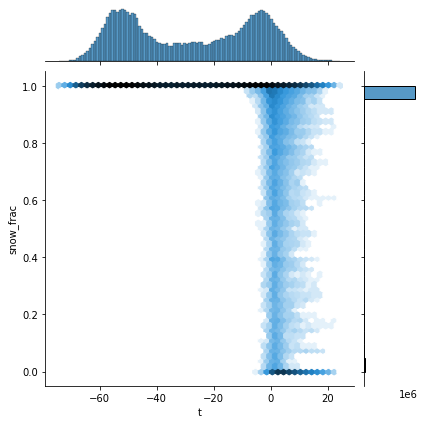

In [47]:
sns.jointplot(x=final_ds['t'], y=final_ds['snow_frac'], kind='hex', bins='log') 

In [48]:
final_ds[(final_ds['snow_frac'] >= 0.95)]

latitude  level  longitude  ...          cswc          t  snow_frac
1023309      40.0      1     -123.5  ... -1.164153e-10 -17.021185        1.0
1023310      40.0      2     -123.5  ... -1.164153e-10 -17.383429        1.0
1023311      40.0      3     -123.5  ... -1.164153e-10 -26.322958        1.0
1023312      40.0      5     -123.5  ... -1.164153e-10 -35.026816        1.0
1023313      40.0      7     -123.5  ... -1.164153e-10 -46.889685        1.0
...           ...    ...        ...  ...           ...        ...        ...
1364         83.0    900      -68.0  ... -1.164153e-10   4.499872        1.0
1365         83.0    925      -68.0  ... -1.164153e-10   5.384088        1.0
1366         83.0    950      -68.0  ... -1.164153e-10   5.066644        1.0
1367         83.0    975      -68.0  ... -1.164153e-10   4.077264        1.0
1368         83.0   1000      -68.0  ... -1.164153e-10   3.602045        1.0

[1003018 rows x 10 columns]

# Isotonic Regression

In [49]:
from sklearn.isotonic import IsotonicRegression

In [50]:
x = final_ds['t']
y = final_ds['snow_frac']
xx = np.linspace(x.min(), x.max(), 1000) # for graphing

ir = IsotonicRegression(increasing=False).fit(x, y)

# Actual predictions
y_pred = ir.predict(x)

# For graphing
yy_pred = ir.predict(xx)

Text(0, 0.5, 'Snow Fraction')

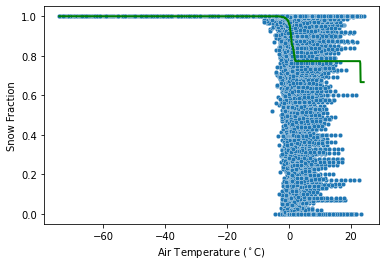

In [51]:
plt.scatter(x, y, marker='o', edgecolor='white', linewidth=0.3, label='Original', s=20)
plt.plot(xx, yy_pred, color='green', label= 'Isotonic', linewidth=2)
plt.xlabel('Air Temperature ($^\circ$C)')
plt.ylabel('Snow Fraction')

# Classification Functions

In [56]:
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix

def cm_plot(y_true, y_pred, classes, cm_fig_path=None,
                normalize=False,
                title=None,
                cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    
    samples = np.array(y_true).shape[0]
    accuracy = np.trace(cm) / float(np.sum(cm)) * 100
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            # print('for i {} and j {} : {}'.format(i, j, cm[i,j]))
            ax.annotate(format(cm[i, j], fmt), (j, i),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black")
    np.set_printoptions(precision=2)
#     plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('\nPredicted label\naccuracy={:0.2f}%; N={}'.format(accuracy, samples))
    plt.ylim([2.5, -.5])
    plt.tight_layout()
    if cm_fig_path is not None:
        plt.savefig(cm_fig_path)
    plt.show()
    plt.close('all')


In [58]:
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, PowerTransformer

def Standardize(X, y, method="robust"):
    if method == "robust":
        X_norm = RobustScaler().fit_transform(np.array(X))
    elif method == "standard":
        X_norm = StandardScaler().fit_transform(np.array(X))
    elif method == "power":
        X_norm = PowerTransformer().fit_transform(np.array(X))
    elif method == "none":
        X_norm = X
    y_encoded = LabelEncoder().fit_transform(y)
    return X_norm, y_encoded

In [62]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

def Train_and_Evaluate_Classifier(X, y_encoded, y, classifier='sgd', normalize=None, kernel='linear', ccp_alpha=0.015, max_depth=30, min_samples_leaf=0.05, min_samples_split=0.05):
    if classifier == 'sgd':
        clf = SGDClassifier(class_weight="balanced", loss='modified_huber', penalty='l1')
        title = "SGD Classifier"
    elif classifier == 'svm':
        if kernel == 'linear':
            clf = LinearSVC(dual=False, class_weight='balanced', penalty='l1')
            title = "LinearSVM Classifier"
        else:
            clf = SVC(kernel=kernel, class_weight='balanced', cache_size=4*1024)
            title = str(kernel + " SVM Classifier")
    elif classifier == 'nb':
        clf = GaussianNB()
#         clf.partial_fit(X, y_encoded, classes=np.unique(y_encoded))
        title = "Naive Bayes Classifier"
    elif classifier == 'gp':
        clf = GaussianProcessClassifier(copy_X_train=False)
        title = 'Gaussian Process Classifier'
    elif classifier == "decision_tree":
        clf = DecisionTreeClassifier(
            class_weight='balanced', 
            ccp_alpha=ccp_alpha, 
            min_samples_leaf=min_samples_leaf,
            max_depth=max_depth, 
            min_samples_split=min_samples_split
        )
        title = "Decision Tree Classifier"
    elif classifier == "random_forest":
        clf = RandomForestClassifier(
            n_jobs=-1, 
            class_weight="balanced_subsample",
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            ccp_alpha=ccp_alpha
        )
        title = "Random Forest Classifier"
    clf.fit(X, y_encoded)
    y_pred = clf.predict(X)           
    pred = [round(value) for value in y_pred]
    print("Classifier Accuracy %.2f%%" % (balanced_accuracy_score(y_encoded, pred) * 100.0))
    print('------------------------------------------------------------------------')
    print(classification_report(y_encoded, pred, target_names=list(np.unique(y))))
    cm_plot(y_encoded, y_pred, list(np.unique(y)), normalize=normalize, cm_fig_path='cm.png', title=title)
    return clf, y_pred

In [ ]:
def Precip_Type(x, lower_thresh=0.05, upper_thresh=0.95):
    if x <= lower_thresh:
        return "Rain"
    elif x > lower_thresh and x <= upper_thresh:
        return "Mixed"
    else:
        return "Snow"

# Classification

In [64]:
final_ds['precip_type'] = final_ds['snow_frac'].map(Precip_Type)
final_ds

latitude  level  longitude  ...          t  snow_frac  precip_type
1023309      40.0      1     -123.5  ... -17.021185        1.0         Snow
1023310      40.0      2     -123.5  ... -17.383429        1.0         Snow
1023311      40.0      3     -123.5  ... -26.322958        1.0         Snow
1023312      40.0      5     -123.5  ... -35.026816        1.0         Snow
1023313      40.0      7     -123.5  ... -46.889685        1.0         Snow
...           ...    ...        ...  ...        ...        ...          ...
1364         83.0    900      -68.0  ...   4.499872        1.0         Snow
1365         83.0    925      -68.0  ...   5.384088        1.0         Snow
1366         83.0    950      -68.0  ...   5.066644        1.0         Snow
1367         83.0    975      -68.0  ...   4.077264        1.0         Snow
1368         83.0   1000      -68.0  ...   3.602045        1.0         Snow

[1035297 rows x 11 columns]

In [65]:
final_ds['precip_type'].value_counts()

Snow     1003018
Rain       22271
Mixed      10008
Name: precip_type, dtype: int64

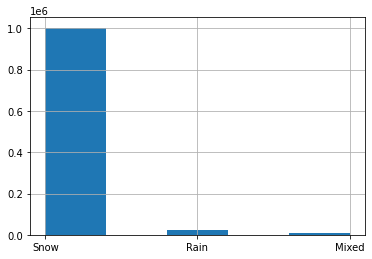

In [55]:
final_ds['precip_type'].hist(bins=5)

In [57]:
y = final_ds['precip_type']
X = np.array(x).reshape(-1, 1)

In [60]:
X_norm, y_encoded = Standardize(X, y)

Classifier Accuracy 51.59%
------------------------------------------------------------------------
              precision    recall  f1-score   support

       Mixed       0.07      0.04      0.05     10008
        Rain       0.20      0.56      0.30     22271
        Snow       0.98      0.95      0.97   1003018

    accuracy                           0.93   1035297
   macro avg       0.42      0.52      0.44   1035297
weighted avg       0.96      0.93      0.94   1035297



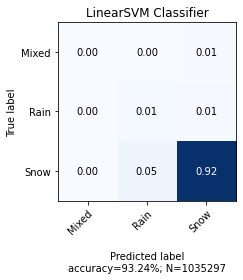

In [63]:
linsvm, linsvm_pred = Train_and_Evaluate_Classifier(X_norm, y_encoded, y, classifier='svm', normalize='all', kernel='linear') 